In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
meta_data = pd.read_csv('dataclean/metadata.csv')
movies_ratings = pd.read_csv('dataclean/movies_ratings.csv')

##### meta_data => ['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue','vote_average', 'vote_count']

##### movies_rating => ['movieId', 'rating_avg', 'rating_count']

In [25]:
# check for duplicates
print('Number of duplicates in metadata: ', meta_data.duplicated().sum())
print('Number of duplicates in movies_ratings: ', movies_ratings.duplicated().sum())

Number of duplicates in metadata:  0
Number of duplicates in movies_ratings:  0


In [26]:
#check for null values
print('Number of null values in metadata: ', meta_data.isnull().sum())
print('Number of null values in movies_ratings: ', movies_ratings.isnull().sum())

Number of null values in metadata:  movie_id        0
title           0
release_date    8
popularity      0
budget          0
revenue         0
vote_average    0
vote_count      0
dtype: int64
Number of null values in movies_ratings:  movieId         0
rating_avg      0
rating_count    0
dtype: int64


8 movies has no release date

In [27]:
len(meta_data) , len(movies_ratings)
# they are supposed to be equal 

(7504, 7503)

In [28]:
#check for any duble values in the id column
print('Number of duplicates in metadata: ', meta_data['movie_id'].duplicated().sum())

Number of duplicates in metadata:  1


In [29]:
# drop the duplicates
meta_data[meta_data['movie_id'] == 4912]

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count
1562,4912,Confessions of a Dangerous Mind,2002-12-30,11.331072,30000000,33013805.0,6.6,281.0
6351,4912,Confessions of a Dangerous Mind,2002-12-30,7.645827,30000000,33013805.0,6.6,281.0


In [30]:
#drop the duplicates
meta_data.drop_duplicates(subset='movie_id', inplace=True)

In [31]:
len(meta_data) , len(movies_ratings)

(7503, 7503)

In [32]:
# join the two dataframes
movies_ratings.rename(columns={'movieId':'movie_id'}, inplace=True)
movie_df = pd.merge(meta_data, movies_ratings, on='movie_id')
movie_df.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,3.60,374
1,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,3.76,123
2,949,Heat,1995-12-15,17.924927,60000000,187436818.0,7.7,1886.0,3.91,2345
3,710,GoldenEye,1995-11-16,14.686036,58000000,352194034.0,6.6,1194.0,2.74,1319
4,1408,Cutthroat Island,1995-12-22,7.284477,98000000,10017322.0,5.7,137.0,3.71,13888


There is a difference between the vote_avg and count in the metadata rather than the one collected from the ratings data, as the recommendation engine relies heavily on the ratings so we will stick to this  

Number of Movies per year

In [33]:
movie_df.dtypes
# convert the release_date column to datetime

movie_id          int64
title            object
release_date     object
popularity      float64
budget            int64
revenue         float64
vote_average    float64
vote_count      float64
rating_avg      float64
rating_count      int64
dtype: object

In [34]:
movie_df.release_date = pd.to_datetime(movie_df.release_date) #, format= '%Y-%m-%d')
movie_df.dtypes

movie_id                 int64
title                   object
release_date    datetime64[ns]
popularity             float64
budget                   int64
revenue                float64
vote_average           float64
vote_count             float64
rating_avg             float64
rating_count             int64
dtype: object

In [35]:
# dropping na values
movie_df.dropna(inplace=True)
movie_df.reset_index(drop=True, inplace=True)
movie_df.isnull().sum()


movie_id        0
title           0
release_date    0
popularity      0
budget          0
revenue         0
vote_average    0
vote_count      0
rating_avg      0
rating_count    0
dtype: int64

In [36]:
movie_df['release_year'] = movie_df.release_date.dt.year
year_agg = movie_df.groupby('release_year', as_index= False).agg({'rating_count': ['sum', 'mean', 'count'], 'rating_avg': ['sum', 'mean']})
year_agg.columns = year_agg.columns.to_flat_index()
year_agg.columns = ['release_year', 'total_votes', 'avg_vote', 'num_movies', 'total_rating', 'avg_rating']
year_agg.head()

,release_year,total_votes,avg_vote,num_movies,total_rating,avg_rating
0,1890,24,24.000000,1,3.56,3.560000
1,1891,17,8.500000,2,7.22,3.610000
2,1892,10,10.000000,1,3.50,3.500000
3,1894,8,2.666667,3,9.58,3.193333
4,1895,51,25.500000,2,5.15,2.575000


Text(0, 0.5, 'Number of movies')

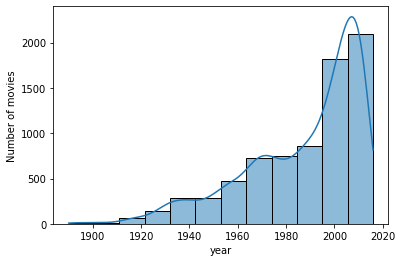

In [37]:
sns.histplot(data= movie_df, x= 'release_year', bins= 12, kde= True)
plt.xlabel('year')
plt.ylabel('Number of movies')

In [38]:
movie_df.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count,release_year
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,3.60,374,1995
1,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,3.76,123,1995
2,949,Heat,1995-12-15,17.924927,60000000,187436818.0,7.7,1886.0,3.91,2345,1995
3,710,GoldenEye,1995-11-16,14.686036,58000000,352194034.0,6.6,1194.0,2.74,1319,1995
4,1408,Cutthroat Island,1995-12-22,7.284477,98000000,10017322.0,5.7,137.0,3.71,13888,1995


In [39]:
movie_df.to_csv('dataclean/movie_df.csv', index=False)

Text(0, 0.5, 'Number of votes')

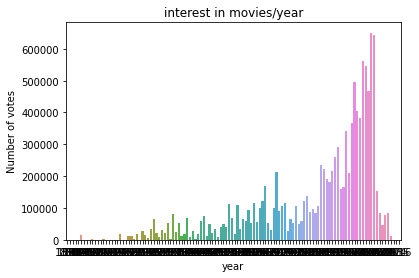

In [18]:
sns.barplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes)
plt.title('interest in movies/year')
plt.xlabel('year')
plt.ylabel('Number of votes')

In [19]:
movie_df.columns

Index(['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue',
       'vote_average', 'vote_count', 'rating_avg', 'rating_count',
       'release_year'],
      dtype='object')

<Axes: xlabel='revenue'>

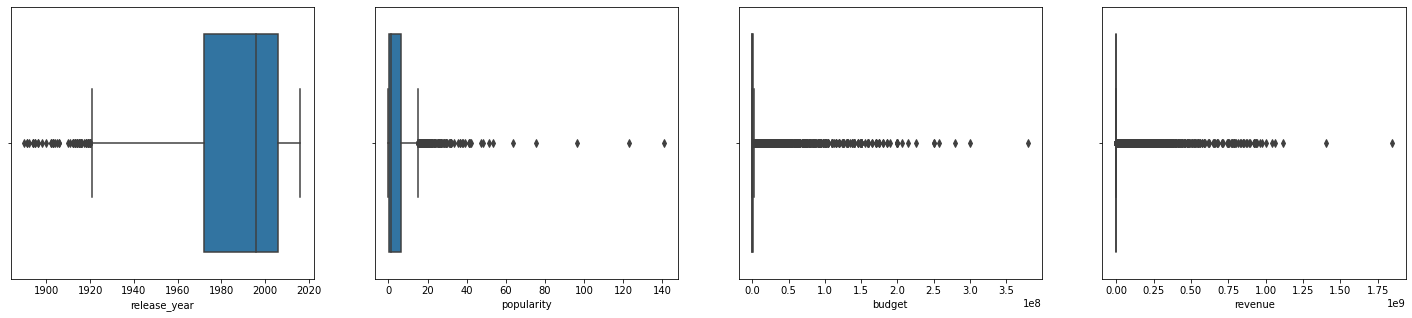

In [20]:
fig, axs = plt.subplots(ncols=4, figsize=(25, 5))
sns.boxplot(data= movie_df, x= 'release_year', ax= axs[0])
sns.boxplot(data= movie_df, x= 'popularity', ax= axs[1])
sns.boxplot(data= movie_df, x= 'budget', ax= axs[2])
sns.boxplot(data= movie_df, x= 'revenue', ax= axs[3])


<Axes: xlabel='rating_avg', ylabel='Count'>

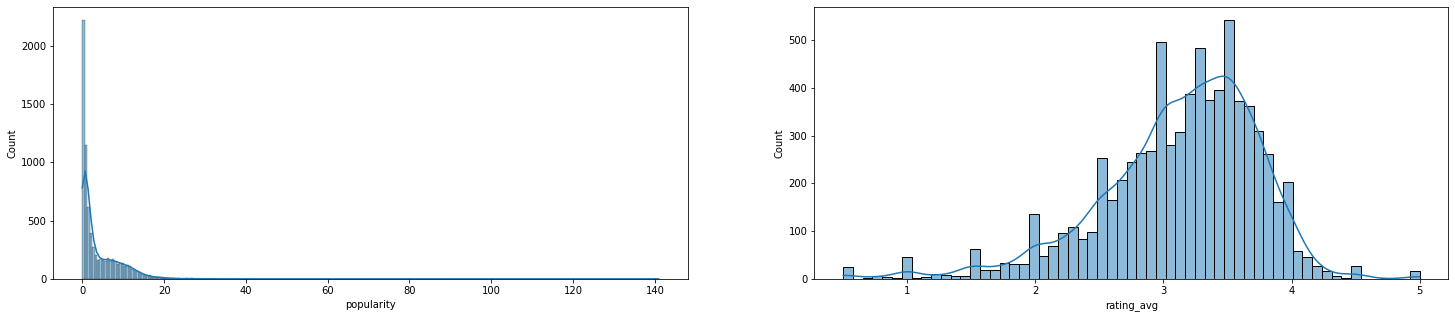

In [21]:
#histograms
fig, axs = plt.subplots(ncols=2, figsize=(25, 5))
sns.histplot(data= movie_df, x= 'popularity', ax= axs[0], kde= True)
sns.histplot(data= movie_df, x= 'rating_avg', ax= axs[1], kde= True)



Text(0, 0.5, 'Number of votes')

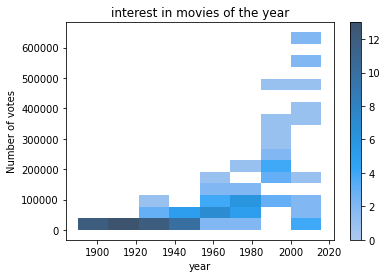

In [22]:
sns.histplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes, cbar= True)
plt.title('interest in movies of the year')
plt.xlabel('year')
plt.ylabel('Number of votes')

In this plot, the number of movies is represented in the color of the square, we can see the number of years having less than 100k votes in each 10 years to have a clearer perception of the data we have  
We can see that the 1960s movies are in contetion and are a drawer for interest with 2 years having more than 150k votes, my biggest concern was if some of the older movies were not well represented they would be lost in the mix, but I can see that however the number of movies was smaller, people tune in and care to vote  
The earlier years may have fewer votes density but this is not a problem as they also have fewer movies density 